In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# setting the model that is encountered
def dynamical_model1(x, alpha):
    return alpha - (x ** 2)
  
def dynamical_model2(x, alpha):
    return alpha - 2 * (x **2) - 3

In [3]:
# setting the jacobians of the models respectively
def jacobian_model1(x):
    return -2 * x

def jacobian_model2(x):
    return -4 * x

In [4]:
def stability(jacobian, point):
    """
    Getting the Jacobian of the model and having a look at the eigenvalues of
    the model. The encountered models are all 1D, hence the Jacobian is the
    deriviative and the sign of the derivative determines the type of the
    state.

    Parameters:
    ----------
    jacobian : callable
      Function to evaluate the Jacobian.
    point: float
      Point of interest, for determining the stability.
    
    Returns:
    ----------
    A string that gives information about the stability of the state.
    """
    if jacobian(point) < 0:
      return 'stable'
    if jacobian(point) > 0:
      return 'unstable'
    return 'saddle'

In [5]:
def bifurcation_diagram(fun_jacob, step=0.001, alpha_min=-1, alpha_max=5):
    """ Creating the bifurcation diagram for a model specified by a function.
    
    Parameters:
    ----------
    fun_jacob : 2-tuple of callables
      The model that the bifurcations is dedicated to. And the jacobian of
      the model. 
    step : float 
      Defines the step size of the discretization for evaluating the model
    alpha_min : float
      The smallest value, alpha (a model parameter) can take
    alpha_max: flaot
      The largest value, alpha (a model parameter) can take

    Returns:
    ----------
    Alpha : list
      A list of all the encoutered parameter values. Which parameters 
      are used depends on the step size.
    X : list
      A list of all the equilibrium points of the model depending on the 
      parameter value.
    """
    Alpha_stable, Alpha_unstable, Alpha_saddle = [], [], []
    X_stable, X_unstable, X_saddle = [], [], []
    fun, jacobian = fun_jacob
    
    for alpha in np.linspace(alpha_min, alpha_max, int((alpha_max - alpha_min)/step) + 1):
        for start in np.linspace(-2, 2, 11):
          # solving the model for its root to get the equilibria
          sol = fsolve(fun, start, args=[alpha], full_output=True)
          if sol[-2] == 1:
            for s in sol[0]:
              stabil = stability(jacobian, s)
              if stabil == 'stable':
                Alpha_stable.append(alpha)
                X_stable.append(s)
              elif stabil == 'unstable':
                Alpha_unstable.append(alpha)
                X_unstable.append(s)
              elif stabil == 'saddle':
                Alpha_saddle.append(alpha)
                X_saddle.append(s)
    return (Alpha_stable, Alpha_unstable, Alpha_saddle), (X_stable, X_unstable, X_saddle) 

alpha_min, alpha_max = -1, 1
Alpha, X = bifurcation_diagram((dynamical_model1, jacobian_model1), step=0.0001, alpha_min=alpha_min, alpha_max=alpha_max)

In [6]:
def plot(ax, Alpha, X, ylim, xlim):
    """
    Plotting for specific cases occuring in this notebook.

    Parameters:
    ----------
    ax : Axes object
      The plotting environment, where the plot should lay on
    Alpha : list
      List of all encountered parameter values that were computed from the 
      bifurcation diagram creation method
    X : list
      List of all equilibrium points that were computed depending on
      the parameter value at the respective position in the Alpha list
    ylim : 2-tuple of floats
      Axes limits in y-direction
    xlim : 2-tuple of floats
      Axes limits in x-direction

    Returns:
    ---------- 
    """
    ax.plot(Alpha, X, ls='', marker='o')
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_xlabel('alpha')
    ax.set_ylabel('X')

In [7]:
def plot_stability(ax, Alpha, X, xlim, ylim=None):
    """
    Plotting the equilibria depending on their stability

    Parameters:
    ----------
    ax : Axes object
      The plotting environment, where the plot should lay on
    Alpha : 3-tuple of lists
      Giving three lists of parameter values depending on the stability
      of there respective equilibrium value computed for the bifurcation
      diagram.
    X : 3-tuple of lists
      Giving three lists of equilibirum values depending on the stability.
      The equilibria were computed dependent on the parameter value at the 
      repective position in the corresponding Alpha list.
    xlim : 2-tuple of floats
      Axes limits in x-direction
    ylim : 2-tuple of floats
      Axes limits in y-direction, can be omitted. In this case, the
      limits will be the minimum and the maximum of all occuring
      equilibrium values.
    
    Returns:
    ----------
    """
    Alpha_stable, Alpha_unstable, Alpha_saddle = Alpha
    X_stable, X_unstable, X_saddle = X

    if not ylim:
      ylim = (min(X_stable + X_unstable + X_saddle), max(X_stable + X_unstable + X_saddle))
    
    plot(ax, Alpha_stable, X_stable, ylim, xlim)
    plot(ax, Alpha_unstable, X_unstable, ylim, xlim)
    plot(ax, Alpha_saddle, X_saddle, ylim, xlim)

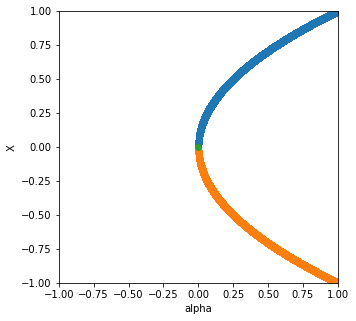

In [8]:
# Plotting the bifurcation diagram for the model that should
# be computed
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
plot_stability(ax, Alpha, X, (alpha_min, alpha_max))
fig.show()

In [9]:
# Calculate the bifurcation diagrams for both models
Alpha_small, X_small = bifurcation_diagram((dynamical_model1, jacobian_model1), step=0.0001, alpha_min=-1, alpha_max=4)
Alpha_large, X_large = bifurcation_diagram((dynamical_model2, jacobian_model2), step=0.0001, alpha_min=2, alpha_max=4)

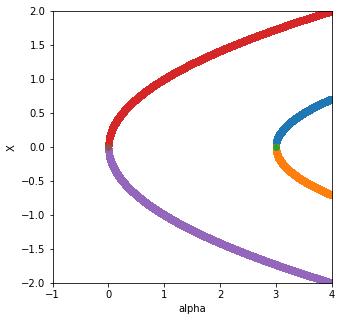

In [10]:
# Plot both bifurcation diagrams in one plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
plot_stability(ax, Alpha_large, X_large, (-1, 4))
plot_stability(ax, Alpha_small, X_small, (-1, 4))
fig.show()